## **Step 1. Imports**

*   Import packages
*   Load dataset


### **Import packages**

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### **Load dataset**

In [2]:
df = pd.read_csv("waze_dataset.csv")
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


## **Step 2. Data Exploration (Initial EDA and data cleaning)**

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 



### **Gather basic information about the data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


### **Gather descriptive statistics about the data**

In [4]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [5]:
df.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

### **Check missing values**

In [6]:
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [7]:
#percent of data missing values
(df.isnull().sum()*100)/df.shape[0]

ID                         0.000000
label                      4.666978
sessions                   0.000000
drives                     0.000000
total_sessions             0.000000
n_days_after_onboarding    0.000000
total_navigations_fav1     0.000000
total_navigations_fav2     0.000000
driven_km_drives           0.000000
duration_minutes_drives    0.000000
activity_days              0.000000
driving_days               0.000000
device                     0.000000
dtype: float64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

### **Check duplicates**

In [10]:
print(df.duplicated().sum())

0


In [11]:
#percent of data duplicated
print((df.duplicated().sum()*100)/df.shape[0])

0.0


## **Check outliers**

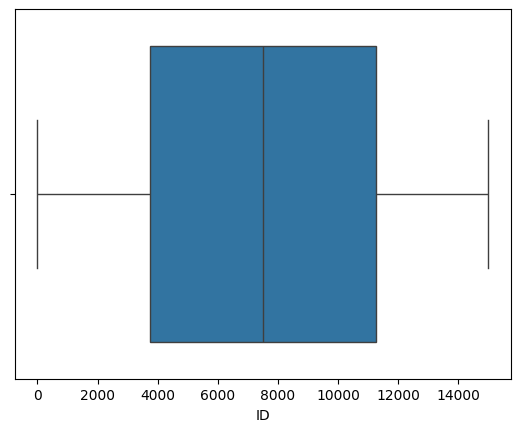

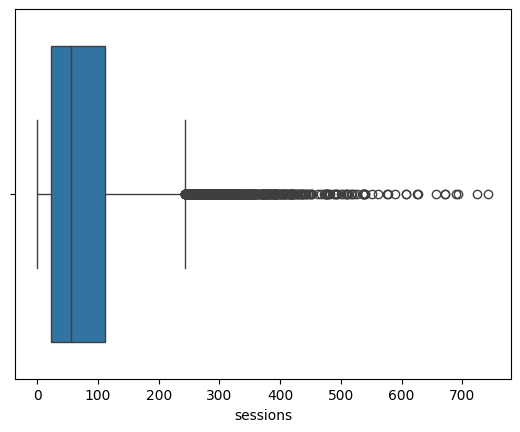

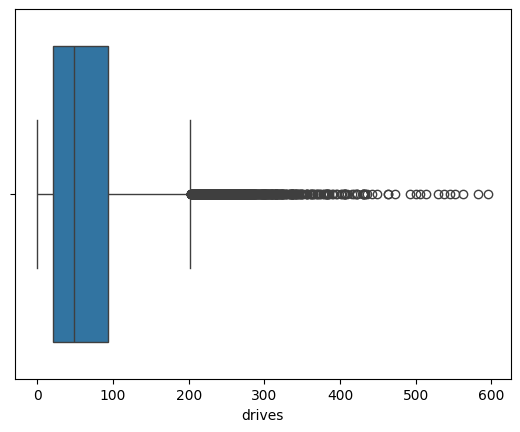

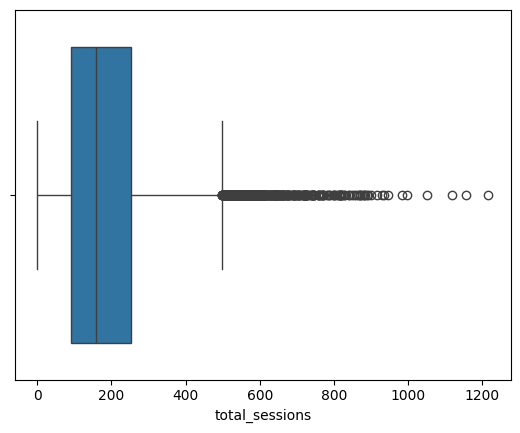

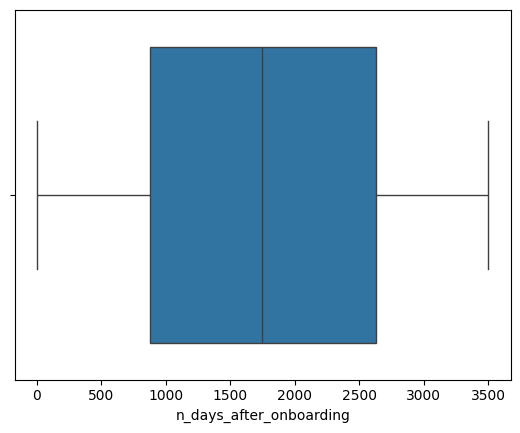

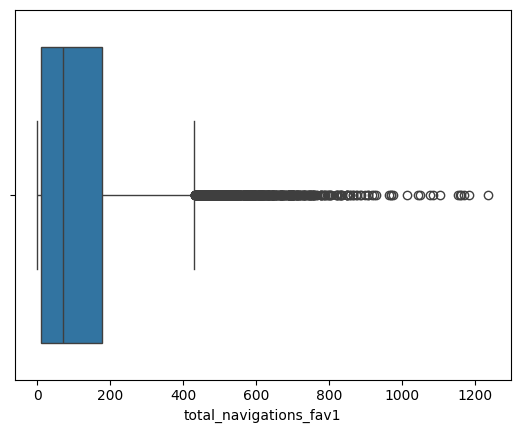

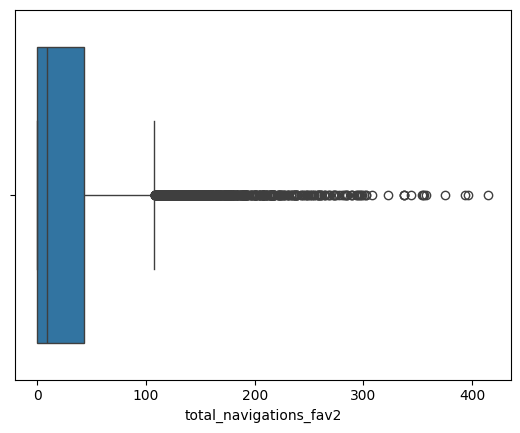

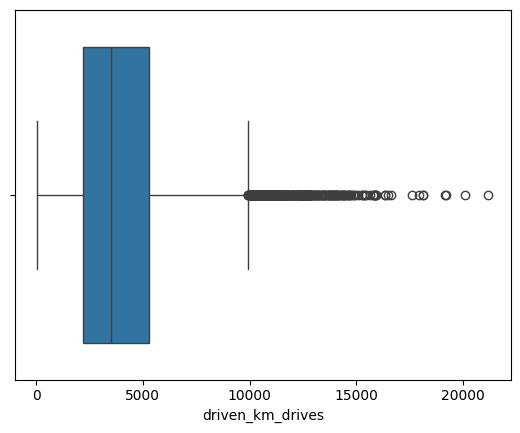

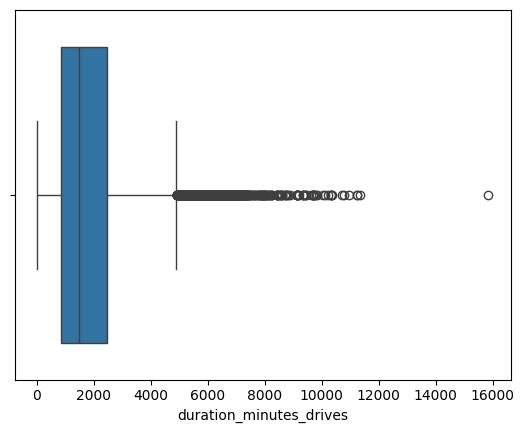

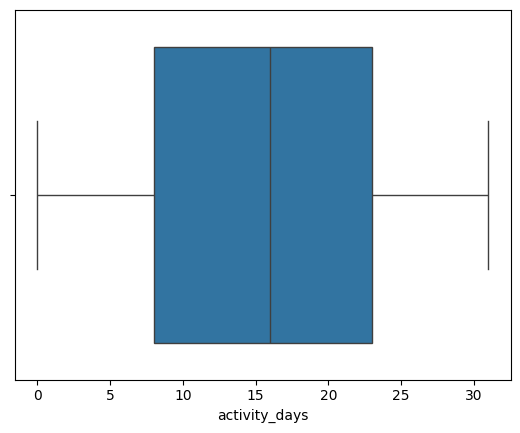

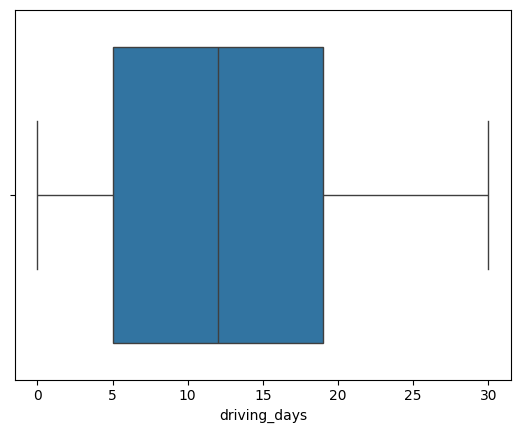

In [12]:
#box plot to identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [13]:
#The boxplot above shows that there are outliers in below columns in columns to check.
# Determine the number of rows containing outliers 
columns_to_check = [
    'sessions', 
    'drives', 
    'total_sessions', 
    'total_navigations_fav1',
    'total_navigations_fav2',
    'driven_km_drives',
    'duration_minutes_drives'
]

# Loop through each column and determine the number of rows containing outliers
for column in columns_to_check:
    # Compute the 25th percentile value
    percentile25 = df[column].quantile(0.25)
    
    # Compute the 75th percentile value
    percentile75 = df[column].quantile(0.75)
    
    # Compute the interquartile range
    iqr = percentile75 - percentile25
    
    # Define the upper limit and lower limit for non-outlier values
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print(f"\nColumn: {column}")
    print("Lower limit:", lower_limit)
    print("Upper limit:", upper_limit)
    
    # Identify subset of data containing outliers
    outliers = df[(df[column] > upper_limit) | (df[column] < lower_limit)]
    
    # Count how many rows in the data contain outliers
    print("Number of rows in the data containing outliers:", len(outliers))

print("-----------------------------------------------------------------------------------------------")



Column: sessions
Lower limit: -109.0
Upper limit: 243.0
Number of rows in the data containing outliers: 709

Column: drives
Lower limit: -89.5
Upper limit: 202.5
Number of rows in the data containing outliers: 695

Column: total_sessions
Lower limit: -154.16634299999998
Upper limit: 498.16452556
Number of rows in the data containing outliers: 500

Column: total_navigations_fav1
Lower limit: -242.0
Upper limit: 430.0
Number of rows in the data containing outliers: 682

Column: total_navigations_fav2
Lower limit: -64.5
Upper limit: 107.5
Number of rows in the data containing outliers: 976

Column: driven_km_drives
Lower limit: -2406.65846925
Upper limit: 9923.95054075
Number of rows in the data containing outliers: 440

Column: duration_minutes_drives
Lower limit: -1599.939955
Upper limit: 4907.0501746
Number of rows in the data containing outliers: 613
-----------------------------------------------------------------------------------------------


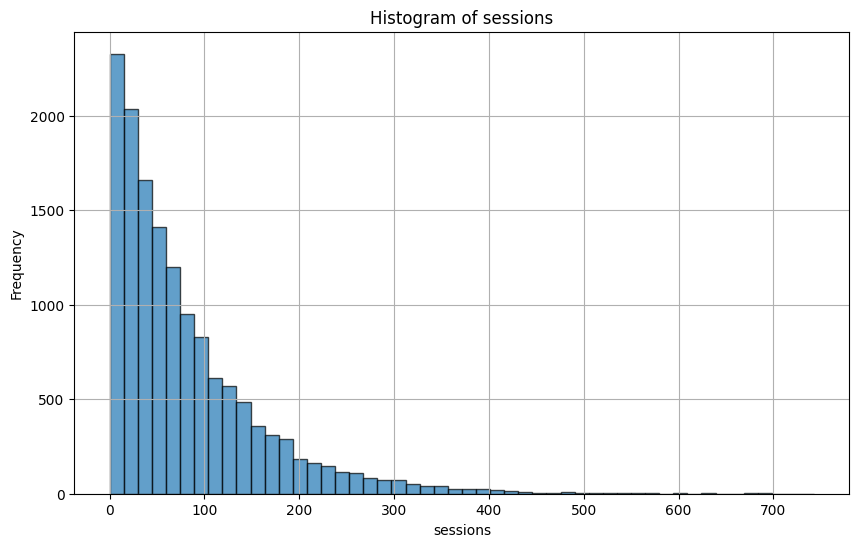

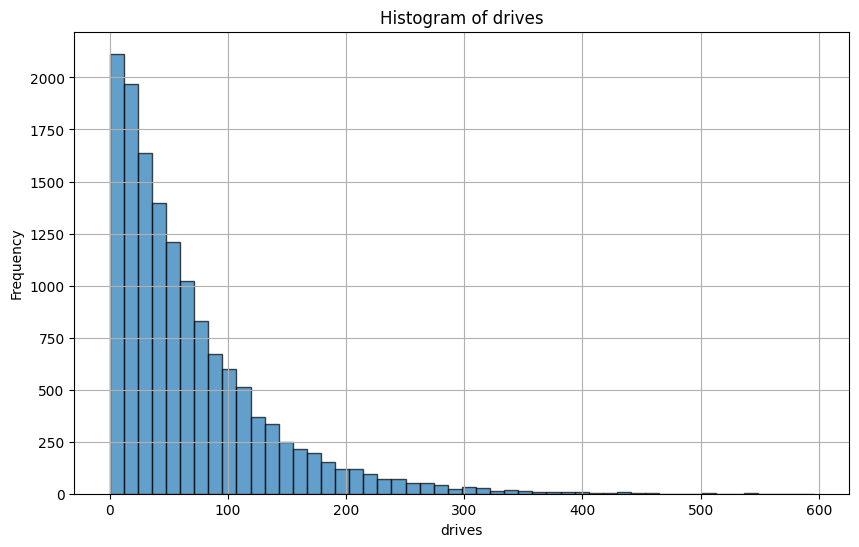

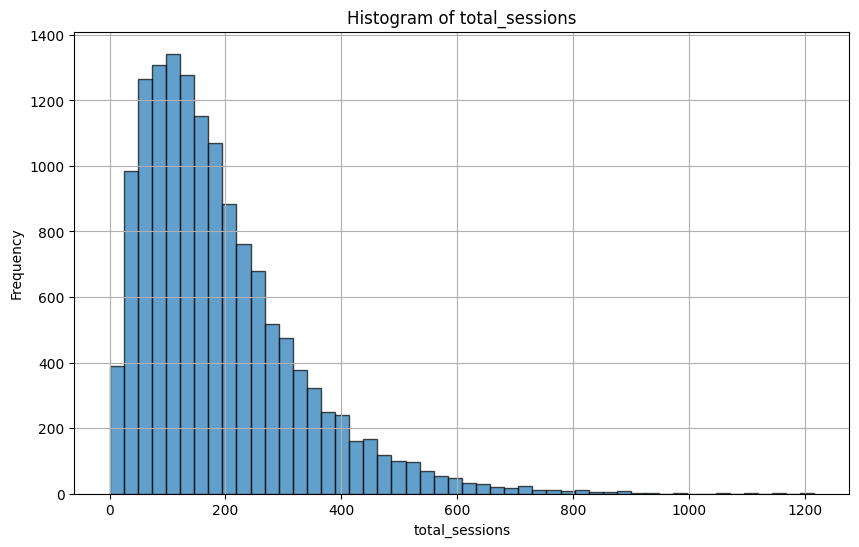

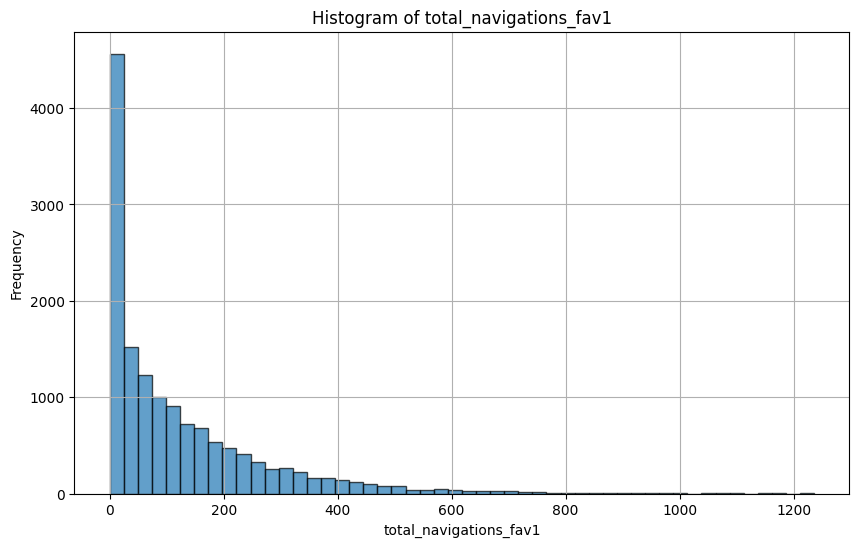

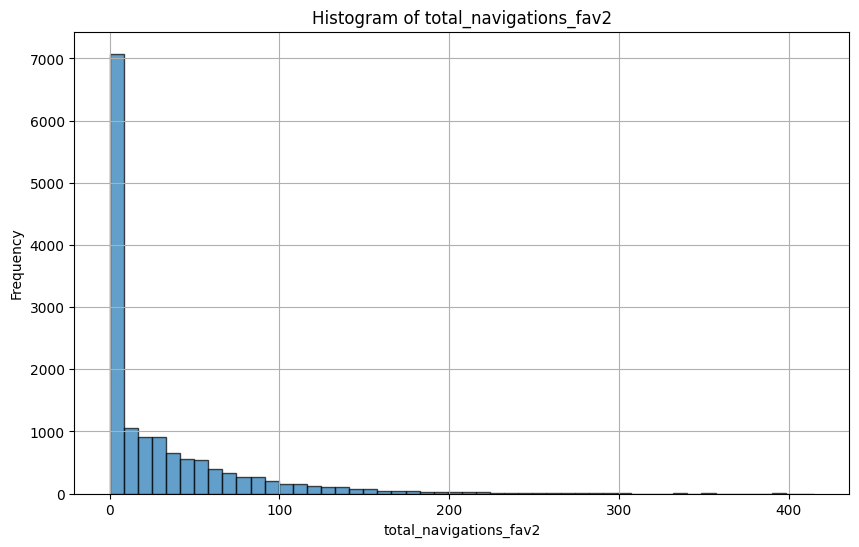

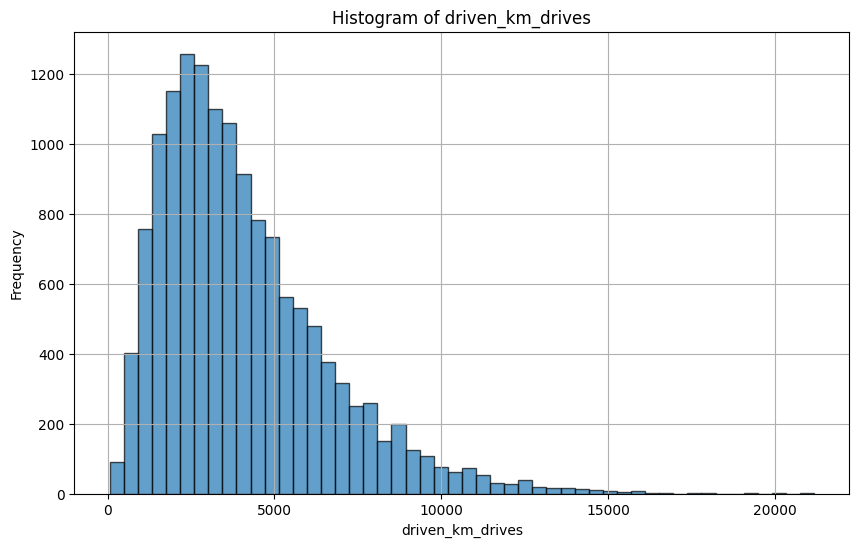

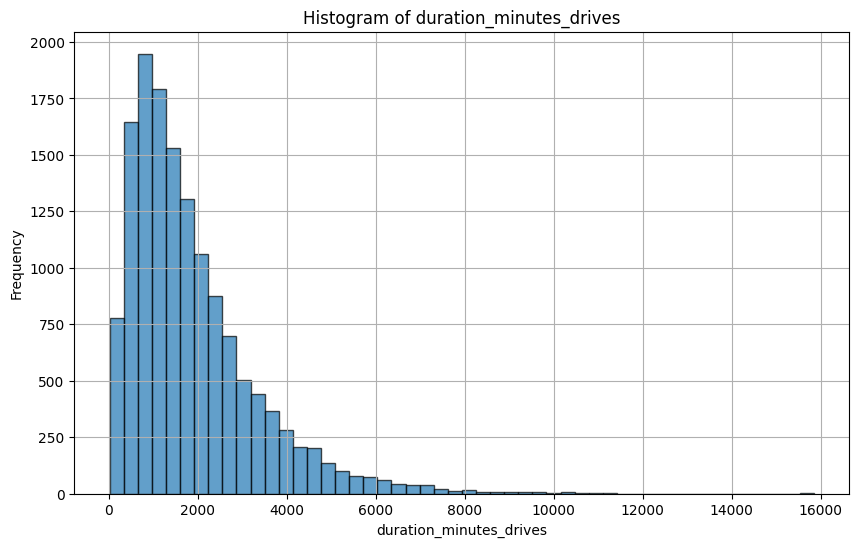

In [19]:
for column in columns_to_check:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=50, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [20]:
def capping_outliers(column_value, lower, upper):
    if column_value > upper:
        return upper
    elif column_value < lower:
        return lower
    else:
        return column_value

# Loop through each column to calculate and cap the outliers
for column in columns_to_check:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    
    # Apply the capping_outliers function to the column
    df[column] = df[column].apply(capping_outliers, args=(lower, upper))

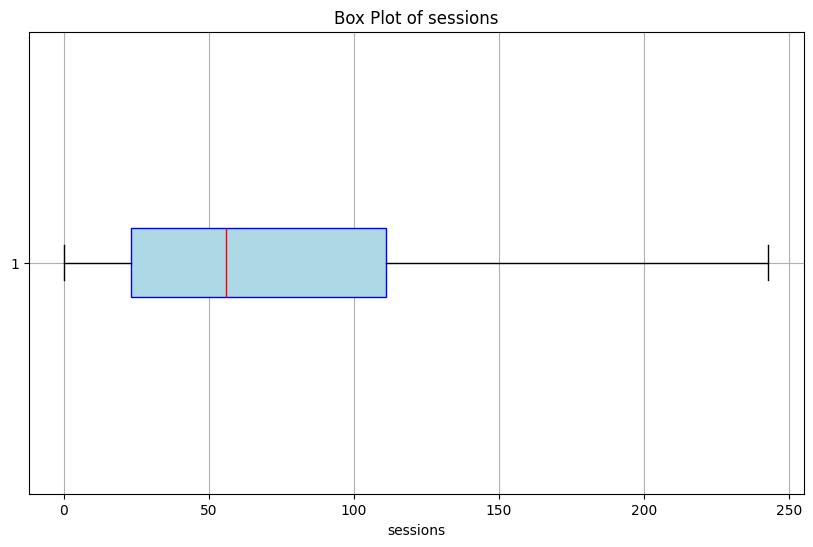

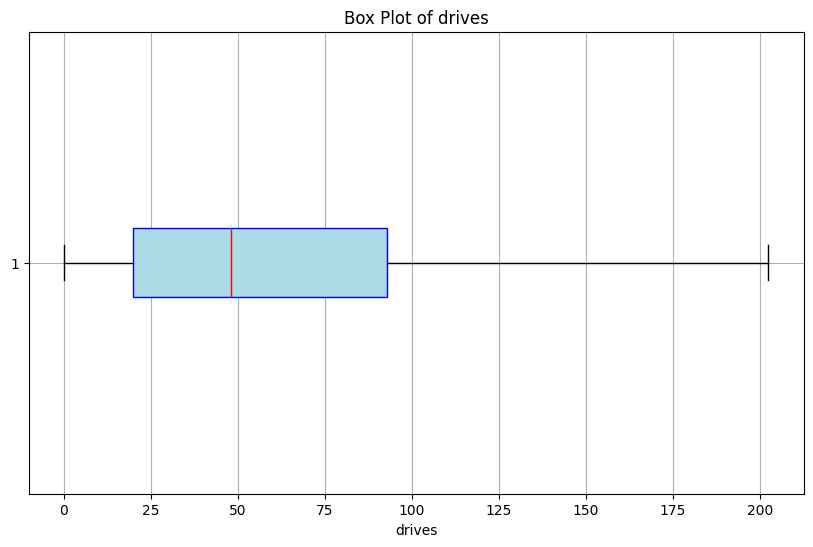

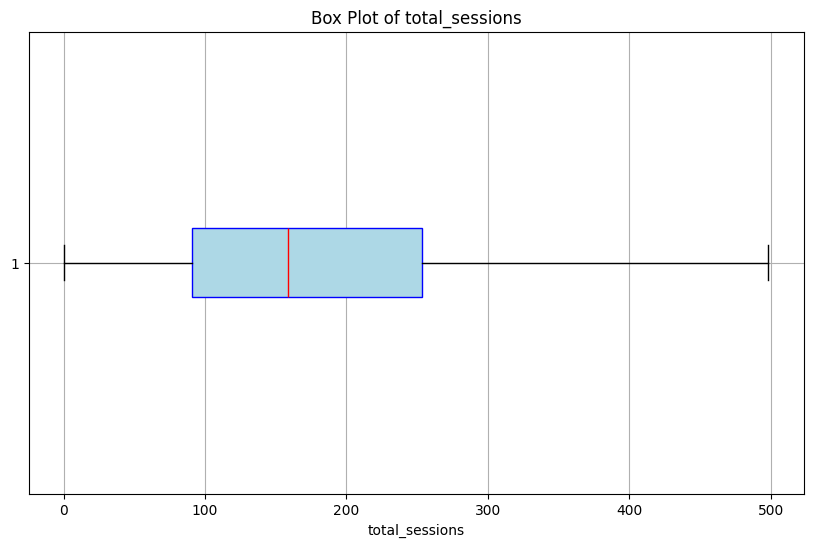

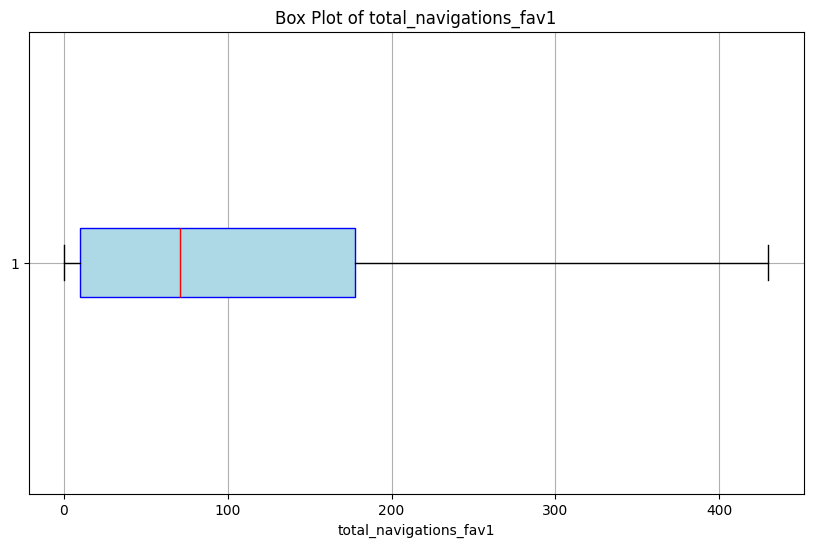

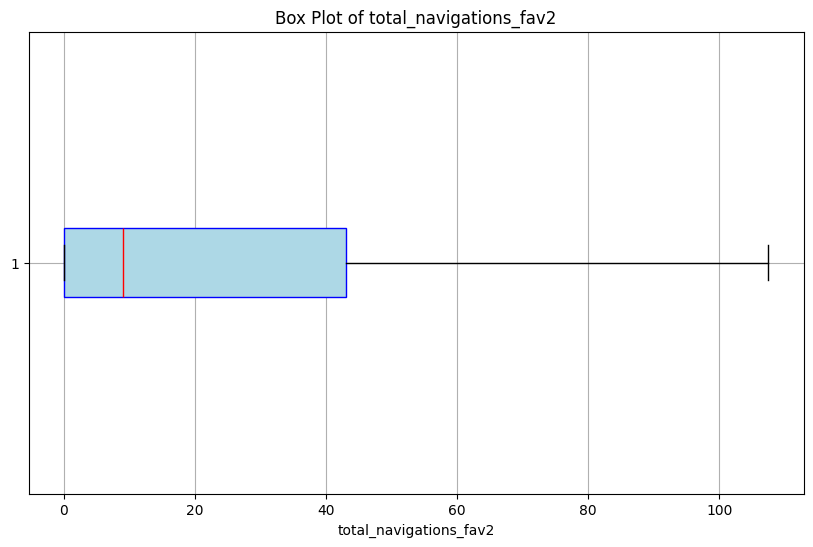

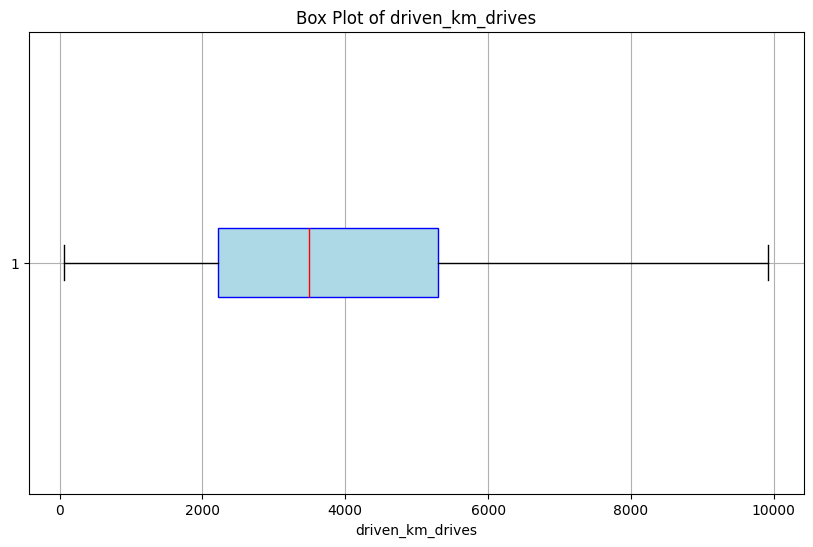

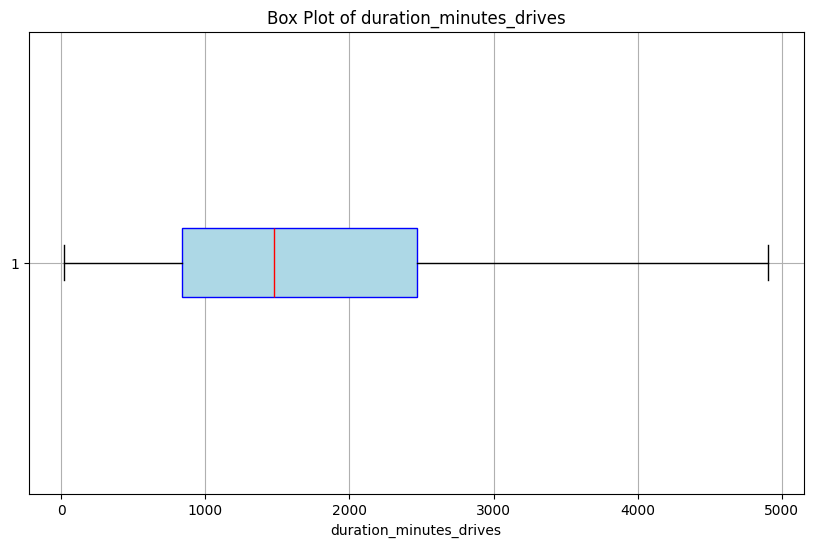

In [23]:
# Loop through the columns and create box plots
for column in columns_to_check:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column], vert=False, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()

In [26]:
df.to_csv("cleaned_waze_Data.csv")

In [90]:
df=pd.read_csv("cleaned_waze_Data.csv")

In [91]:
df.head()

,Unnamed: 0,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,0,retained,243.0,202.5,296.748273,2276,208.0,0.0,2628.845068,1985.775061,28,19,Android
1,1,1,retained,133.0,107.0,326.896596,1225,19.0,64.0,9923.950541,3160.472914,13,11,iPhone
2,2,2,retained,114.0,95.0,135.522926,2651,0.0,0.0,3059.148818,1610.735904,14,8,Android
3,3,3,retained,49.0,40.0,67.589221,15,322.0,7.0,913.591123,587.196542,7,3,iPhone
4,4,4,retained,84.0,68.0,168.247020,1562,166.0,5.0,3950.202008,1219.555924,27,18,Android


## **Step 2. Data Exploration (Continue EDA)**



### **Data visualizations**

In [92]:
df1=df.copy()

In [186]:
df1.columns

Index(['Unnamed: 0', 'ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

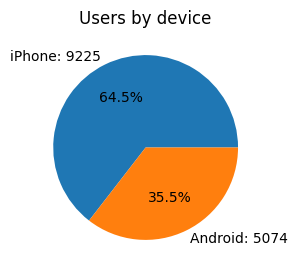

In [187]:
#box plot and histograms for numeric variables

#for categorical variables

# Pie chart
fig = plt.figure(figsize=(3,3))
data=df1['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

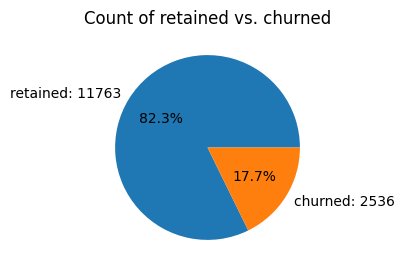

In [188]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df1['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

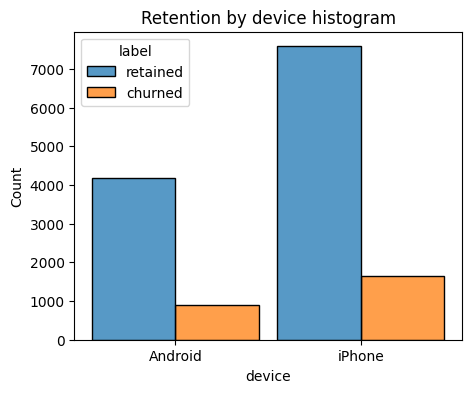

In [189]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

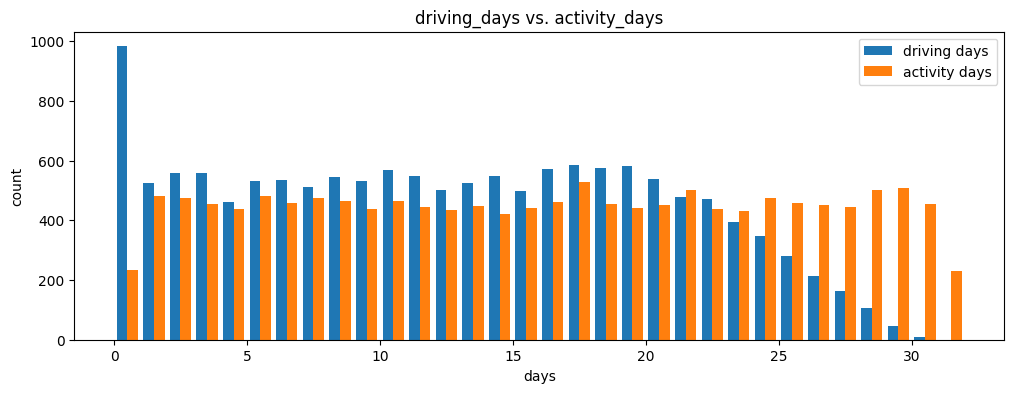

In [200]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df1['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

In [201]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


In [190]:
df1.columns

Index(['Unnamed: 0', 'ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [197]:
categorical_columns = df1.select_dtypes(include=['object', 'category']).columns
numerical_columns = df1.select_dtypes(include=['number']).columns



Value counts for device grouped by claim_status:
 device    Android  iPhone
label                    
churned       891    1645
retained     4183    7580 



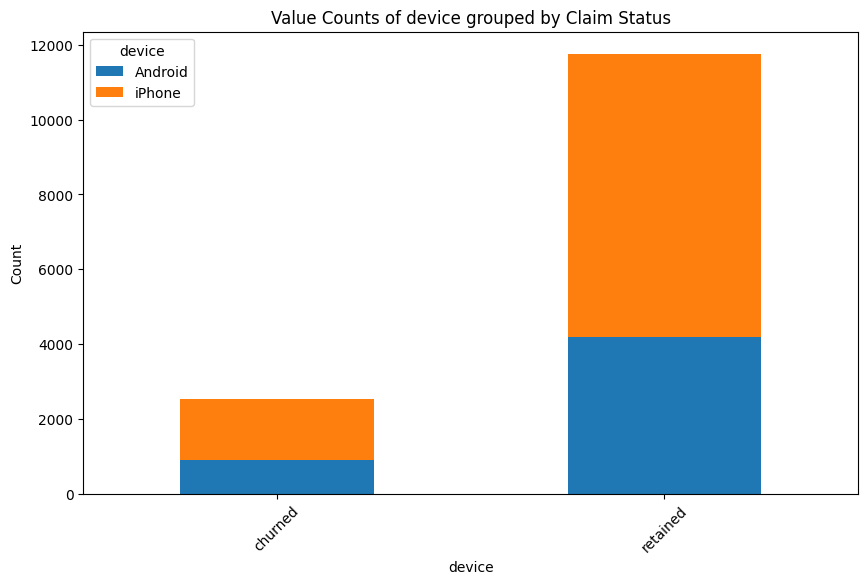

In [198]:
# Function to plot value counts grouped by label
def plot_value_counts_by_label(df, column):
    grouped_counts = df.groupby('label')[column].value_counts().unstack().fillna(0)
    print(f"Value counts for {column} grouped by claim_status:\n", grouped_counts, "\n")
    grouped_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Value Counts of {column} grouped by Claim Status')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

# Generate value counts and count plots for categorical columns
for column in categorical_columns:
    if column != 'label':
        plot_value_counts_by_label(df1, column)



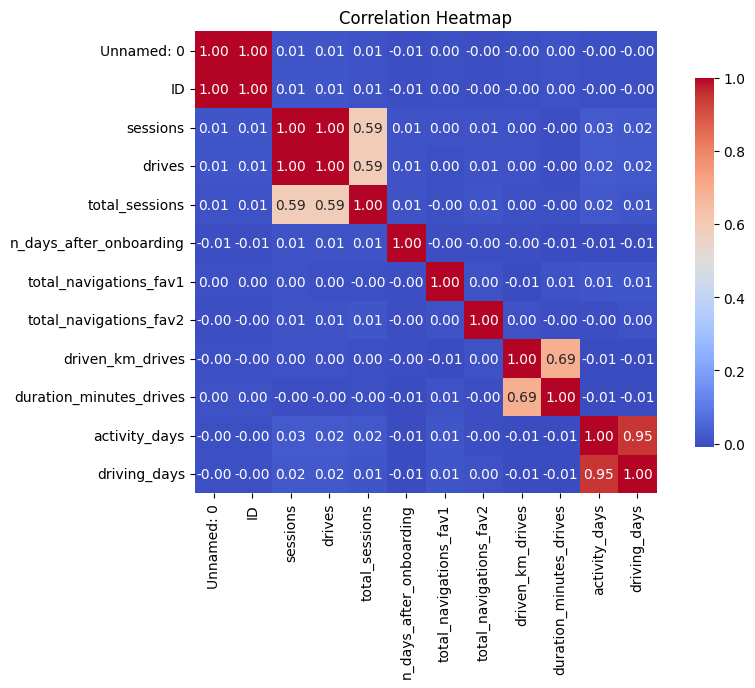

In [199]:
correlation_matrix=df1[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

### **Insights**
- Analysis revealed that the overall churn rate is ~17%, and that this rate is consistent between iPhone users and Android users.
- Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.
- Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as driven_km_drives. Some of the monthly variables also might be problematic, such as activity_days and driving_days, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.
- Users of all tenures from brand new to ~10 years were relatively evenly represented in the data. This is borne out by the histogram for n_days_after_onboarding, which reveals a uniform distribution for this variable.



## **Step 3. Model Building, Step 4. Results and Evaluation**
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### **Feature Engineering**

In [94]:
# 1. Create `km_per_driving_day` feature
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Get descriptive stats
df['km_per_driving_day'].describe()

C:\Users\Probook\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.494736e+02
max               inf
Name: km_per_driving_day, dtype: float64

Notice that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [95]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14299.000000
mean       572.930074
std        992.463400
min          0.000000
25%        136.168003
50%        273.301012
75%        550.734989
max       9923.950541
Name: km_per_driving_day, dtype: float64

In [96]:
# 1. Create `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

# 2. Get descriptive stats
df['percent_sessions_in_last_month'].describe()

count    14299.000000
mean         0.442858
std          0.278603
min          0.000000
25%          0.199438
50%          0.426675
75%          0.665012
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

In [97]:
# Create `professional_driver` feature
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [98]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

In [99]:
# Get descriptive stats
df['total_sessions_per_day'].describe()

count    14299.000000
mean         0.333020
std          1.306035
min          0.000298
25%          0.050818
50%          0.100457
75%          0.210226
max         39.763874
Name: total_sessions_per_day, dtype: float64

In [100]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14299.000000
mean       190.350841
std        337.439349
min         72.013095
25%         92.487940
50%        121.731988
75%        191.927875
max      23642.920871
Name: km_per_hour, dtype: float64

In [101]:
# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

C:\Users\Probook\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.429900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.363788e+01
50%      7.451666e+01
75%      1.839711e+02
max               inf
Name: km_per_drive, dtype: float64

In [102]:
# 1. Convert infinite values to zero
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0

# 2. Confirm that it worked
df['km_per_drive'].describe()

count    14299.000000
mean       228.444200
std        588.587997
min          0.000000
25%         32.885021
50%         72.606220
75%        178.374204
max       9923.950541
Name: km_per_drive, dtype: float64

In [103]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_drives_to_favorite'] = (
    df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']

# Get descriptive stats
df['percent_of_drives_to_favorite'].describe()

count    14299.000000
mean         1.570292
std          8.317078
min          0.000000
25%          0.210994
50%          0.637451
75%          1.582607
max        681.133494
Name: percent_of_drives_to_favorite, dtype: float64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14299 entries, 0 to 14298
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      14299 non-null  int64  
 1   ID                              14299 non-null  int64  
 2   label                           14299 non-null  object 
 3   sessions                        14299 non-null  float64
 4   drives                          14299 non-null  float64
 5   total_sessions                  14299 non-null  float64
 6   n_days_after_onboarding         14299 non-null  int64  
 7   total_navigations_fav1          14299 non-null  float64
 8   total_navigations_fav2          14299 non-null  float64
 9   driven_km_drives                14299 non-null  float64
 10  duration_minutes_drives         14299 non-null  float64
 11  activity_days                   14299 non-null  int64  
 12  driving_days                    

### **encoding non numeric variables**
- device is a categorical variable which means you can dummy it for modeling.
- label is categorical too but its outcome variable so it's better not to dummy this column, but rather to convert the levels to numbers.

In [105]:
df.head()


,Unnamed: 0,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_drives_to_favorite
0,0,0,retained,243.0,202.5,296.748273,2276,208.0,0.0,2628.845068,1985.775061,28,19,Android,138.360267,0.818876,1,0.130381,79.430298,12.981951,0.700931
1,1,1,retained,133.0,107.0,326.896596,1225,19.0,64.0,9923.950541,3160.472914,13,11,iPhone,902.177322,0.406856,0,0.266854,188.401245,92.747201,0.253903
2,2,2,retained,114.0,95.0,135.522926,2651,0.0,0.0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0,0.051121,113.953460,32.201567,0.000000
3,3,3,retained,49.0,40.0,67.589221,15,322.0,7.0,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0,4.505948,93.351141,22.839778,4.867640
4,4,4,retained,84.0,68.0,168.247020,1562,166.0,5.0,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,1,0.107713,194.342970,58.091206,1.016363


In [106]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Copy df to df_enc
df_enc = df.copy()

# Nominal columns to one-hot encode
nominal_cols = ['device']

# Ordinal columns to label encode
ordinal_cols = {
    'label':['churned','retained']
}

# Apply one-hot encoding to nominal variables
df_enc = pd.get_dummies(df_enc, columns=nominal_cols)

# Apply label encoding to ordinal variables

label_encoders = {}
for col, categories in ordinal_cols.items():
    le = LabelEncoder()
    le.fit(categories)
    df_enc[col] = le.transform(df_enc[col])
    label_encoders[col] = le

In [72]:
df_enc.head()


,Unnamed: 0,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_drives_to_favorite,device_Android,device_iPhone
0,0,0,0,243.0,202.5,296.748273,2276,208.0,0.0,2628.845068,1985.775061,28,19,138.360267,0.818876,1,0.130381,79.430298,12.981951,0.700931,True,False
1,1,1,0,133.0,107.0,326.896596,1225,19.0,64.0,9923.950541,3160.472914,13,11,902.177322,0.406856,0,0.266854,188.401245,92.747201,0.253903,False,True
2,2,2,0,114.0,95.0,135.522926,2651,0.0,0.0,3059.148818,1610.735904,14,8,382.393602,0.841186,0,0.051121,113.953460,32.201567,0.000000,True,False
3,3,3,0,49.0,40.0,67.589221,15,322.0,7.0,913.591123,587.196542,7,3,304.530374,0.724968,0,4.505948,93.351141,22.839778,4.867640,False,True
4,4,4,0,84.0,68.0,168.247020,1562,166.0,5.0,3950.202008,1219.555924,27,18,219.455667,0.499266,1,0.107713,194.342970,58.091206,1.016363,True,False


In [107]:
df_enc['label'].value_counts()

label
1    11763
0     2536
Name: count, dtype: int64

In [108]:
#scaling numerical features
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding','total_navigations_fav1','total_navigations_fav2','driven_km_drives','duration_minutes_drives','activity_days','driving_days','km_per_driving_day','percent_sessions_in_last_month','total_sessions_per_day','km_per_hour','km_per_drive','percent_of_drives_to_favorite']

# Fit and transform the numerical features
df_enc[numerical_cols] = scaler.fit_transform(df_enc[numerical_cols])
df_enc.head()

,Unnamed: 0,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_drives_to_favorite,device_Android,device_iPhone
0,0,0,1,2.475584,2.496972,0.904064,0.519693,0.742305,-0.764500,-0.585935,0.145311,1.381506,0.870290,-0.437885,1.349704,1,-0.155161,-0.328724,-0.366079,-0.104531,True,False
1,1,1,1,0.839673,0.774139,1.149095,-0.522316,-0.765496,1.101719,2.566732,1.084308,-0.282245,-0.150957,0.331759,-0.129224,0,-0.050663,-0.005778,-0.230555,-0.158281,False,True
2,2,2,1,0.557107,0.557658,-0.406298,0.891485,-0.917074,-0.764500,-0.399974,-0.154477,-0.171328,-0.533924,-0.191990,1.429786,0,-0.215851,-0.226411,-0.333424,-0.188810,True,False
3,3,3,1,-0.409568,-0.434550,-0.958430,-1.721964,1.651773,-0.560382,-1.327202,-0.972645,-0.947745,-1.172204,-0.270447,1.012624,0,3.195223,-0.287468,-0.349330,0.396469,False,True
4,4,4,1,0.110949,0.070574,-0.140332,-0.188199,0.407238,-0.618701,-0.014894,-0.467167,1.270590,0.742634,-0.356171,0.202476,1,-0.172519,0.011831,-0.289437,-0.066604,True,False


### **Modeling Approach A: Logistic Regression Model**


### **Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables 
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size 

In [132]:
df_logreg = df_enc.copy()

# Display first few rows of new dataframe
df_logreg.head()


,Unnamed: 0,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_drives_to_favorite,device_Android,device_iPhone
0,0,0,1,2.475584,2.496972,0.904064,0.519693,0.742305,-0.764500,-0.585935,0.145311,1.381506,0.870290,-0.437885,1.349704,1,-0.155161,-0.328724,-0.366079,-0.104531,True,False
1,1,1,1,0.839673,0.774139,1.149095,-0.522316,-0.765496,1.101719,2.566732,1.084308,-0.282245,-0.150957,0.331759,-0.129224,0,-0.050663,-0.005778,-0.230555,-0.158281,False,True
2,2,2,1,0.557107,0.557658,-0.406298,0.891485,-0.917074,-0.764500,-0.399974,-0.154477,-0.171328,-0.533924,-0.191990,1.429786,0,-0.215851,-0.226411,-0.333424,-0.188810,True,False
3,3,3,1,-0.409568,-0.434550,-0.958430,-1.721964,1.651773,-0.560382,-1.327202,-0.972645,-0.947745,-1.172204,-0.270447,1.012624,0,3.195223,-0.287468,-0.349330,0.396469,False,True
4,4,4,1,0.110949,0.070574,-0.140332,-0.188199,0.407238,-0.618701,-0.014894,-0.467167,1.270590,0.742634,-0.356171,0.202476,1,-0.172519,0.011831,-0.289437,-0.066604,True,False


**checking severe multicollinearity among X variables**

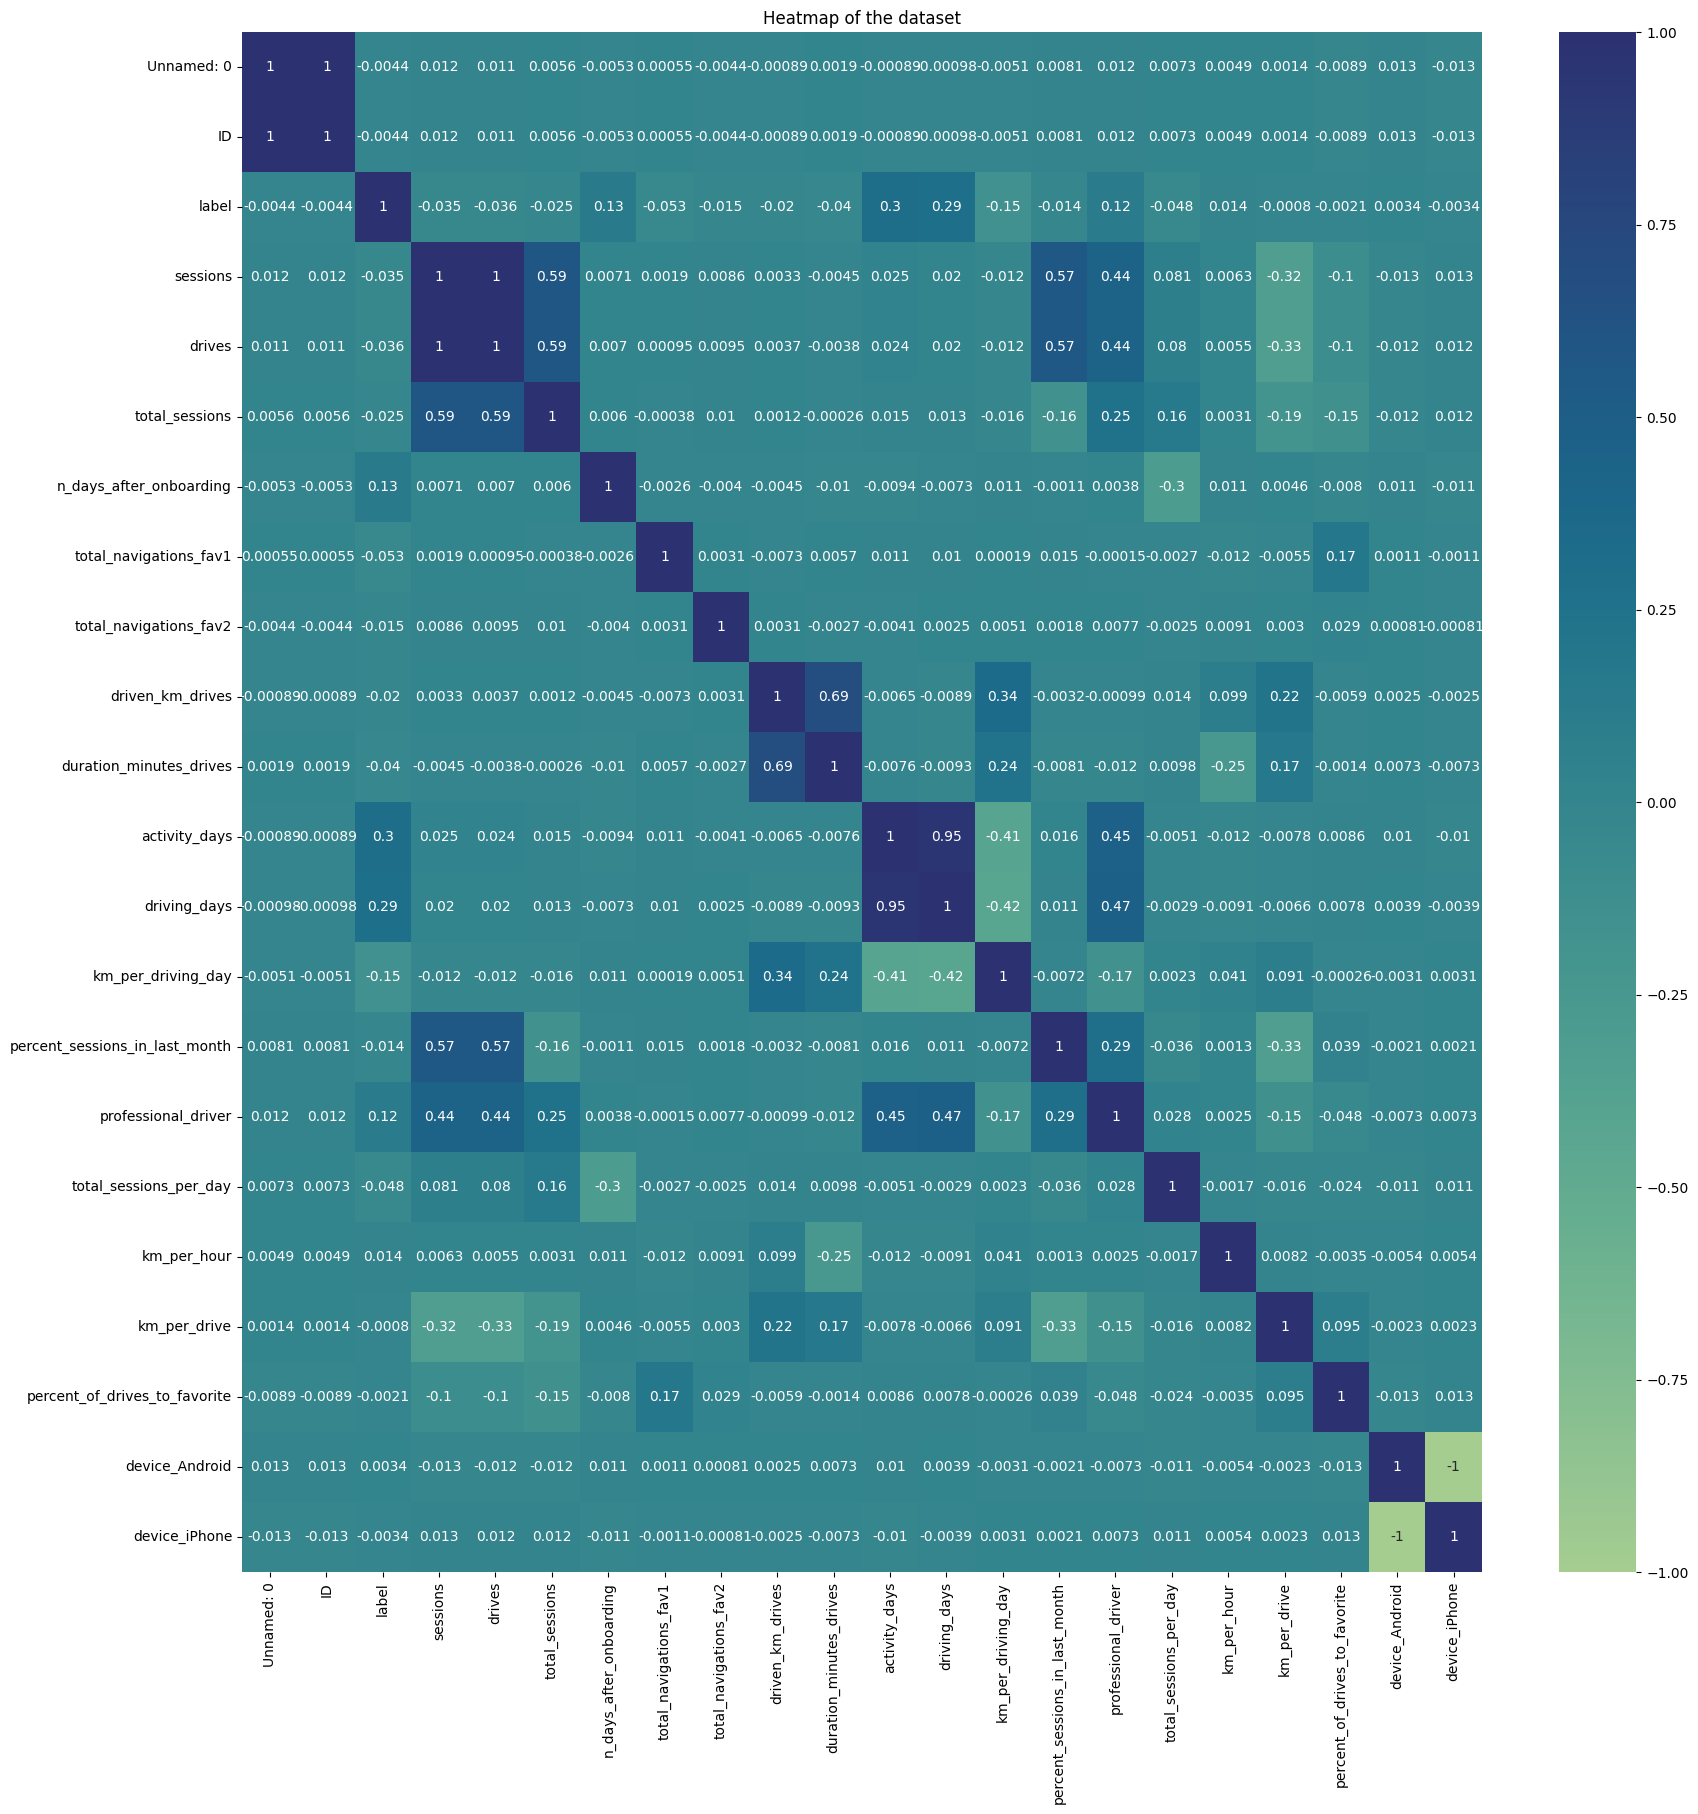

In [133]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(20, 20))
sns.heatmap(df_logreg.corr(numeric_only=True),
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

from the above heatmap it is better to remove activity days for severe multicollinearity assumption

In [134]:
df_logreg['label'].value_counts(normalize=True)

label
1    0.822645
0    0.177355
Name: proportion, dtype: float64

In [136]:
# Use resampling to create class balance in the outcome variable, if needed
from sklearn.utils import resample
# Identify data points from majority and minority classes
data_majority = df_logreg[df_logreg["label"] == 1]
data_minority = df_logreg[df_logreg["label"] == 0]

# Upsample the minority class (which is "churned")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["label"].value_counts()

label
1    11763
0    11763
Name: count, dtype: int64

In [137]:
df_logreg=data_upsampled.copy()
df_logreg.head()

,Unnamed: 0,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_drives_to_favorite,device_Android,device_iPhone
0,0,0,1,2.475584,2.496972,0.904064,0.519693,0.742305,-0.764500,-0.585935,0.145311,1.381506,0.870290,-0.437885,1.349704,1,-0.155161,-0.328724,-0.366079,-0.104531,True,False
1,1,1,1,0.839673,0.774139,1.149095,-0.522316,-0.765496,1.101719,2.566732,1.084308,-0.282245,-0.150957,0.331759,-0.129224,0,-0.050663,-0.005778,-0.230555,-0.158281,False,True
2,2,2,1,0.557107,0.557658,-0.406298,0.891485,-0.917074,-0.764500,-0.399974,-0.154477,-0.171328,-0.533924,-0.191990,1.429786,0,-0.215851,-0.226411,-0.333424,-0.188810,True,False
3,3,3,1,-0.409568,-0.434550,-0.958430,-1.721964,1.651773,-0.560382,-1.327202,-0.972645,-0.947745,-1.172204,-0.270447,1.012624,0,3.195223,-0.287468,-0.349330,0.396469,False,True
4,4,4,1,0.110949,0.070574,-0.140332,-0.188199,0.407238,-0.618701,-0.014894,-0.467167,1.270590,0.742634,-0.356171,0.202476,1,-0.172519,0.011831,-0.289437,-0.066604,True,False


In [138]:
# Isolate the outcome variable
y = df_logreg['label']

# Display first few rows of the outcome variable
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [139]:
y.value_counts(normalize=True)

label
1    0.5
0    0.5
Name: proportion, dtype: float64

In [140]:
df_logreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23526 entries, 0 to 23525
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      23526 non-null  int64  
 1   ID                              23526 non-null  int64  
 2   label                           23526 non-null  int64  
 3   sessions                        23526 non-null  float64
 4   drives                          23526 non-null  float64
 5   total_sessions                  23526 non-null  float64
 6   n_days_after_onboarding         23526 non-null  float64
 7   total_navigations_fav1          23526 non-null  float64
 8   total_navigations_fav2          23526 non-null  float64
 9   driven_km_drives                23526 non-null  float64
 10  duration_minutes_drives         23526 non-null  float64
 11  activity_days                   23526 non-null  float64
 12  driving_days                    

In [141]:
# Select the features you want to use in your model
df_logreg.drop('Unnamed: 0', axis=1,inplace=True)
df_logreg.drop('ID', axis=1,inplace=True)
df_logreg.drop('activity_days', axis=1,inplace=True)
df_logreg.drop('label', axis=1,inplace=True)
X=df_logreg.copy()
# Display the first few rows of the selected features 
X.head()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,driving_days,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_drives_to_favorite,device_Android,device_iPhone
0,2.475584,2.496972,0.904064,0.519693,0.742305,-0.764500,-0.585935,0.145311,0.870290,-0.437885,1.349704,1,-0.155161,-0.328724,-0.366079,-0.104531,True,False
1,0.839673,0.774139,1.149095,-0.522316,-0.765496,1.101719,2.566732,1.084308,-0.150957,0.331759,-0.129224,0,-0.050663,-0.005778,-0.230555,-0.158281,False,True
2,0.557107,0.557658,-0.406298,0.891485,-0.917074,-0.764500,-0.399974,-0.154477,-0.533924,-0.191990,1.429786,0,-0.215851,-0.226411,-0.333424,-0.188810,True,False
3,-0.409568,-0.434550,-0.958430,-1.721964,1.651773,-0.560382,-1.327202,-0.972645,-1.172204,-0.270447,1.012624,0,3.195223,-0.287468,-0.349330,0.396469,False,True
4,0.110949,0.070574,-0.140332,-0.188199,0.407238,-0.618701,-0.014894,-0.467167,0.742634,-0.356171,0.202476,1,-0.172519,0.011831,-0.289437,-0.066604,True,False


In [142]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [143]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [144]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

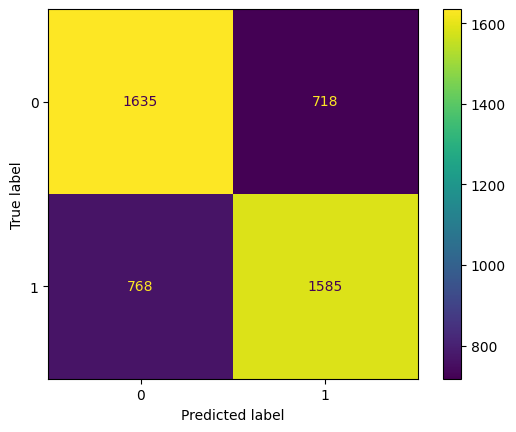

In [145]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: Users correctly identified as churned.

False positives: Users incorrectly identified as retained.

False negatives: Users incorrectly identified as churned

True positives: Users correctly identified as retained

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Check the class balance in the data. In other words, check the value counts in the `label` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [146]:
# Create classification report for logistic regression model
target_names = ['Predicted churned', 'Predicted retained']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

 Predicted churned       0.68      0.69      0.69      2353
Predicted retained       0.69      0.67      0.68      2353

          accuracy                           0.68      4706
         macro avg       0.68      0.68      0.68      4706
      weighted avg       0.68      0.68      0.68      4706



The classification report above shows that the logistic regression model achieved a precision of 68%, recall of 68%, f1-score of 68% (all weighted averages), and accuracy of 68% after oversampling. 

### **Modeling Approach B: Tree-based Model**


In [147]:
rf=df_enc.copy()
rf.head()

,Unnamed: 0,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_drives_to_favorite,device_Android,device_iPhone
0,0,0,1,2.475584,2.496972,0.904064,0.519693,0.742305,-0.764500,-0.585935,0.145311,1.381506,0.870290,-0.437885,1.349704,1,-0.155161,-0.328724,-0.366079,-0.104531,True,False
1,1,1,1,0.839673,0.774139,1.149095,-0.522316,-0.765496,1.101719,2.566732,1.084308,-0.282245,-0.150957,0.331759,-0.129224,0,-0.050663,-0.005778,-0.230555,-0.158281,False,True
2,2,2,1,0.557107,0.557658,-0.406298,0.891485,-0.917074,-0.764500,-0.399974,-0.154477,-0.171328,-0.533924,-0.191990,1.429786,0,-0.215851,-0.226411,-0.333424,-0.188810,True,False
3,3,3,1,-0.409568,-0.434550,-0.958430,-1.721964,1.651773,-0.560382,-1.327202,-0.972645,-0.947745,-1.172204,-0.270447,1.012624,0,3.195223,-0.287468,-0.349330,0.396469,False,True
4,4,4,1,0.110949,0.070574,-0.140332,-0.188199,0.407238,-0.618701,-0.014894,-0.467167,1.270590,0.742634,-0.356171,0.202476,1,-0.172519,0.011831,-0.289437,-0.066604,True,False


In [149]:
# 1. Isolate X variables
X = rf.drop(columns=['Unnamed: 0', 'ID','label'])

# 2. Isolate y variable
y = rf['label']

# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

Verify the number of samples in the partitioned data.

In [150]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8579
2860
2860


#### **Random forest**

In [151]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [152]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 29min 55s
Wall time: 30min 21s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [153]:
# Define a path to the folder where you want to save the model
path = 'C:/Users/Probook/Desktop/ML Model for Waze/'

In [154]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [155]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [156]:
# Write pickle
write_pickle(path, rf_cv, 'rf_waze')

In [159]:
# Read pickle
rf_cv = read_pickle(path, 'rf_waze')

In [157]:
# Check best recall score on CV
print(rf_cv.best_score_)

0.9957485402092849


In [158]:
# Check best params
print(rf_cv.best_params_)

{'max_depth': 5, 'max_features': 0.3, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [160]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [161]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.826123,0.995749,0.903039,0.824105


In [162]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [163]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 33min 42s
Wall time: 4min 18s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [164]:
# Write pickle
write_pickle(path, xgb_cv, 'xgb_waze')

In [165]:
# Read pickle
xgb_cv = read_pickle(path, 'xgb_waze')

In [166]:
xgb_cv.best_score_

np.float64(0.9892304702806524)

In [167]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300}

In [168]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.826123,0.995749,0.903039,0.824105
0,XGB cv,0.830577,0.989230,0.902988,0.825155


The Decision Tree shows the highest precision (0.9925) and F1 score (0.9961), while the Random Forest excels in AUC (0.9989), indicating better overall class separation. The XGBoost model has the perfect recall (1.0), but slightly lower precision (0.9878) and F1 score (0.9939)

## **Evaluate models**

Evaluate models against validation data.


In [169]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [170]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [171]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.826123,0.995749,0.903039,0.824105
0,XGB cv,0.830577,0.989230,0.902988,0.825155
0,RF val,0.827160,0.996600,0.904009,0.825874


In [172]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.826123,0.995749,0.903039,0.824105
0,XGB cv,0.830577,0.989230,0.902988,0.825155
0,RF val,0.827160,0.996600,0.904009,0.825874
0,XGB val,0.828714,0.991075,0.902651,0.824126


- except for precision in every aspect random forest performs well


### **Use champion model to predict on test data**


In [173]:
# Use random forest model to predict on test data
rf_test_preds = rf_cv.best_estimator_.predict(X_test)

# Get test scores for random forest model
rf_test_scores = get_test_scores('rf test', rf_test_preds, y_test)

# Append to the results table
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.826123,0.995749,0.903039,0.824105
0,XGB cv,0.830577,0.989230,0.902988,0.825155
0,RF val,0.827160,0.996600,0.904009,0.825874
0,XGB val,0.828714,0.991075,0.902651,0.824126
0,rf test,0.825458,0.994900,0.902293,0.822727


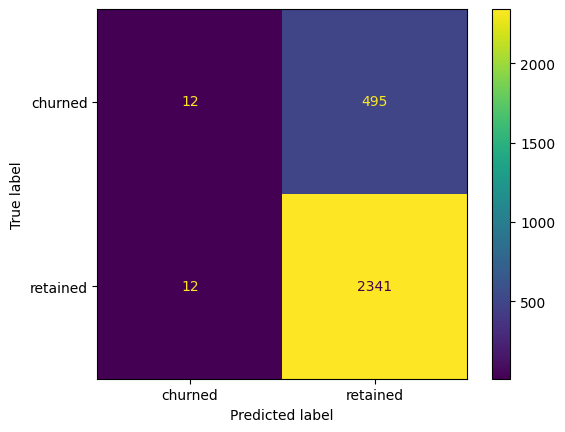

In [175]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_test_preds, labels=rf_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['churned', 'retained'])
disp.plot();

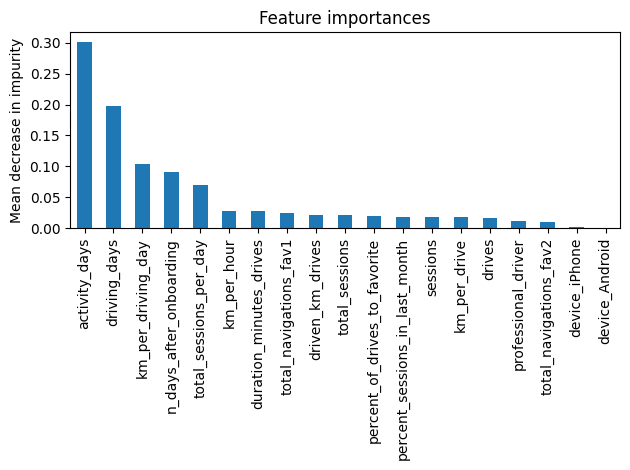

In [185]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

# Sorting the feature importances in descending order
rf_importances = rf_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

plt.show()


The plot above shows that in this random forest model `activity days`, `driving days`, `km per driving day`, `n days after onboarding`, and `total sessions per day ` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `label`.

## **Step 4. Results and Evaluation**
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




###### **Summary of model results**

**Logistic Regression**

The logistic regression model achieved precision of 68%, recall of 68%, f1-score of 68% (all weighted averages), and accuracy of 68%, on the test set.

**Tree-based Machine Learning and XGBOOST**

These models performed well on both the validation and test holdout data. The champion model was Random Forest which achieved precision of 82%, recall of 99%, f1-score of 90% (all weighted averages), and accuracy of 82%, on the test set.

### **Conclusion**

In the Waze project focused on preventing user churn, various machine learning models were utilized to predict which users are most likely to churn. The objective was to develop an accurate prediction model to improve user retention, ultimately contributing to Waze's growth and business goals.
The Random Forest model's superior performance suggests it is the most suitable model for predicting user churn in the Waze app. With high precision and recall, the model can accurately identify users at high risk of churning, allowing Waze to proactively engage these users and implement retention strategies effectively.

By leveraging the insights from the Random Forest model, Waze leadership can optimize the company’s retention strategy, enhance user experience, and make informed decisions about product development. This will help in reducing churn rates, increasing user satisfaction, and promoting overall growth for Waze.
